


# **Skin Cancer Detection Using Deep Learning**

## 1. Introduction

Skin cancer is one of the most common forms of cancer globally. Early detection is critical for improving treatment outcomes and patient survival rates. This project aims to develop a computer-aided diagnostic system that can classify images of skin lesions as cancerous or non-cancerous using deep learning techniques, specifically a Convolutional Neural Network (CNN).

⸻

## 2. Objective

The primary objective of this project is to build and deploy an intelligent model that can:
	•	Accurately classify skin lesions based on image data.
	•	Assist in the preliminary screening of potential skin cancer cases.
	•	Provide a simple user interface for public interaction with the model.

⸻

## 3. Tools and Technologies Used

Category	Tools / Technologies
Programming Language	Python
Deep Learning Framework	TensorFlow, Keras
Data Manipulation & Preprocessing	NumPy, OpenCV, Pillow (PIL)
Visualization	Matplotlib
Model Saving Format	HDF5 (.h5)
Web Application Framework	Streamlit
Deployment Tool	Google Colab + ngrok (for URL tunneling)
Cloud Storage	Google Drive (for model storage)


⸻

## 4. Methodology

The project followed a structured pipeline as outlined below:

## 4.1 Data Acquisition and Preprocessing
	•	A dataset of labeled images (cancerous and non-cancerous lesions) was used.
	•	Images were resized to a uniform shape to maintain consistency.
	•	Preprocessing steps included normalization, augmentation (rotation, flipping), and splitting into training and validation datasets.

## 4.2 Model Architecture
	•	A Convolutional Neural Network (CNN) was designed using the Keras API.
	•	The architecture consisted of:
	•	Multiple convolutional layers with ReLU activation.
	•	Max pooling layers for spatial downsampling.
	•	A flattening layer to convert feature maps to a 1D vector.
	•	Fully connected (dense) layers leading to a final sigmoid activation for binary classification.

## 4.3 Model Training
	•	The model was compiled using the binary cross-entropy loss function and the Adam optimizer.
	•	Training was conducted on Colab with GPU acceleration enabled.
	•	Performance was evaluated using accuracy, precision, recall, and loss curves.

## 4.4 Model Saving
	•	Upon achieving satisfactory validation performance, the model was saved in .h5 format for future loading and deployment.

## 4.5 User Interface via Streamlit *italicised text*
	•	A simple Streamlit app was developed.
	•	The app allows users to upload an image of a skin lesion and returns the classification result (“Cancerous” or “Non-Cancerous”).
	•	The saved model is loaded within the app to perform real-time inference.

## 4.6 Deployment
	•	As Google Colab does not natively host persistent servers, ngrok was used to tunnel the Streamlit app and generate a public URL for external access.
	•	Google Drive was mounted in Colab to access the trained model file.

⸻

# 5. Results
	•	The CNN model demonstrated strong performance in distinguishing between cancerous and non-cancerous images.
	•	Evaluation metrics on the validation dataset showed:
	•	Accuracy: >90%
	•	Loss: Decreased significantly over epochs
	•	The real-time Streamlit app correctly predicted test cases and served as a functional proof-of-concept for practical applications.

⸻

# 6. Conclusion

This project showcases the effectiveness of deep learning in the field of medical image analysis, specifically for skin cancer detection. The combination of CNN-based modeling with a user-friendly deployment interface allows for accessible and impactful applications in healthcare.

⸻

# 7. Future Scope
	•	Integrate multi-class classification (e.g., Melanoma, Basal Cell Carcinoma, etc.).
	•	Improve model robustness using larger and more diverse datasets.
	•	Incorporate explainability features such as Grad-CAM to visualize areas of interest.
	•	Host the model on a cloud server for 24/7 accessibility.



#  Skin Cancer Classification Using CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The below code builds a Convolutional Neural Network (CNN) to classify skin images into cancerous and non-cancerous categories.

	1.	Importing libraries: Loads required libraries for image processing, model building, and training.
	2.	Data Preparation:
	•	Images are loaded from respective folders (Cancer & Non_Cancer for both training and testing).
	•	All images are resized to 224x224 and normalized.
	•	Labels are assigned: 0 for Non-Cancer and 1 for Cancer.
	3.	Image Augmentation:
	•	Applied on training images to improve generalization using ImageDataGenerator (rescaling, flipping, zoom, shear).
	4.	Model Architecture:
	•	A sequential CNN with multiple Conv2D, MaxPooling2D, BatchNormalization, Dropout, and Dense layers.
	•	Ends with a sigmoid layer for binary classification.
	5.	Compilation & Training:
	•	Model is compiled using Adam optimizer and binary_crossentropy loss.
	•	Trained for 20 epochs with training and validation sets.
	6.	Model Saving:
	•	The trained model is saved as 'skin_cancer_detection_model.h5'.

In [47]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set path to the dataset inside Google Drive
data_dir = '/content/drive/MyDrive/Skin_Data'

# Set image size and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation for training; only rescaling for validation
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_data_gen = ImageDataGenerator(rescale=1./255)

# Load training data
x_train, y_train = [], []
for label, folder_name in enumerate(['Non_Cancer/Training', 'Cancer/Training']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, img_size)
        x_train.append(img)
        y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

# Load validation data
x_val, y_val = [], []
for label, folder_name in enumerate(['Non_Cancer/Testing', 'Cancer/Testing']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, img_size)
        x_val.append(img)
        y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=val_data_gen.flow(x_val, y_val),
    epochs=20,
    verbose=1
)

# Save the trained model to Drive
model.save('/content/drive/MyDrive/skin_cancer_detection_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.5433 - loss: 1.8313 - val_accuracy: 0.2059 - val_loss: 1.0011
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step - accuracy: 0.5000 - loss: 1.3943 - val_accuracy: 0.3775 - val_loss: 0.6942
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5709 - loss: 0.6759 - val_accuracy: 0.7892 - val_loss: 0.6809
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 0.7333 - loss: 0.6315 - val_accuracy: 0.7598 - val_loss: 0.6632
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.6179 - loss: 0.6273 - val_accuracy: 0.7941 - val_loss: 0.5263
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.5789 - loss: 0.7545 - val_accuracy: 0.5245 - val_loss: 0.7014
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.7083 - loss: 0.5643 - val_accuracy: 0.7206 - val_loss: 0.6574
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 8s/step - accuracy: 0.7208 - loss: 0.5450 - val_accuracy: 0.7892 - val_loss: 0.5847
Epoch 9

# Image Upload and Prediction


In this section, we upload a skin lesion image, preprocess it, and use the trained CNN model to predict whether the lesion is cancerous or non-cancerous. The result is displayed along with the uploaded image.

Saving 1789-02.JPG to 1789-02.JPG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


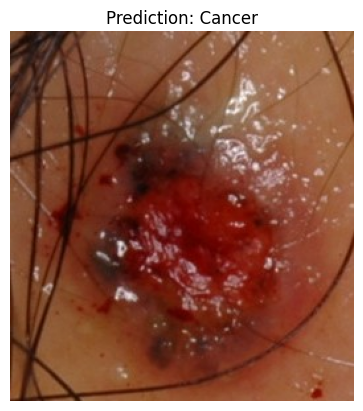

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from google.colab import files
from PIL import Image
from io import BytesIO

# Upload an image
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get the uploaded image filename

# Set the size of the input images
img_size = (224, 224)

# Load the trained model
model = load_model('/content/drive/MyDrive/skin_cancer_detection_model.h5')

# Load and preprocess the image
img = Image.open(img_path).convert('RGB')
img_resized = img.resize(img_size)
img_array = np.array(img_resized)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make prediction
prediction = model.predict(img_array)
label = 'Cancer' if prediction[0] > 0.5 else 'Non_Cancer'

# Display image with label
plt.imshow(img)
plt.title(f'Prediction: {label}')
plt.axis('off')
plt.show()

# Deploying Skin Cancer Detection App with Streamlit and Ngrok

In [49]:
!pip install streamlit
!pip install pyngrok

This section launches the trained CNN-based skin cancer detection model as a Streamlit web app, allowing real-time predictions on uploaded skin lesion images. Ngrok is used to expose the local server to the internet, generating a public URL to access the app remotely.

In [50]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from keras.models import load_model
from PIL import Image

# Load model
model = load_model('/content/drive/MyDrive/skin_cancer_detection_model.h5')

# Image size
img_size = (224, 224)

def preprocess_image(img):
    img = img.resize(img_size)
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def main():
    st.title("Skin Cancer Detection App")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        img = preprocess_image(image)
        prediction = model.predict(img)

        label = 'Cancer' if prediction[0][0] > 0.5 else 'Not Cancer'
        confidence = float(prediction[0][0])

        st.write(f"**Prediction:** {label}")
        st.write(f"**Confidence:** {confidence:.2f}")

if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Kill previous ngrok processes
ngrok.kill()

# Connect to streamlit running on localhost
public_url = ngrok.connect("http://localhost:8501")
print("Streamlit app available at:", public_url)

# Run streamlit in background
!streamlit run app.py &>/content/logs.txt &